### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
customers=pd.read_csv("C:/Python/Class/Exercise/Exercise/3. Pandas Case Study 1 - Retail Case Study/Customer.csv")
prod_hier=pd.read_csv("C:/Python/Class/Exercise/Exercise/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv")
transactions=pd.read_csv("C:/Python/Class/Exercise/Exercise/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv")

In [113]:
# renaming "prod_sub_cat_code" column in 'prod_info' table to make it similar to 'transaction' table
# to merge the both the tables easily
prod_hier.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [117]:
customer_final = pd.merge(left=transactions, right=prod_hier
                          ,on=["prod_cat_code","prod_subcat_code"],how="left")

In [118]:
customer_final=pd.merge(left=customers,right=customer_final,
         left_on="customer_Id",
         right_on="cust_id",
         how="right")

customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids


In [127]:
 #converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

### 2. Prepare a summary report for the merged data set.  
### a. Get the column names and their corresponding data types

In [128]:
customer_final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

###  b. Top/Bottom 10 observations

In [129]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,1970-01-02,M,4.0,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens
3,268408,1970-01-02,M,4.0,28810141075,268408,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,1970-01-02,M,4.0,64633435931,268408,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids
5,268408,1970-01-02,M,4.0,56902862040,268408,2013-01-30,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
6,268408,1970-01-02,M,4.0,56844530655,268408,2012-10-14,1,2,5,1175,616.875,6491.875,MBR,Footwear,Mens
7,268408,1970-01-02,M,4.0,19516063887,268408,2012-07-09,10,3,4,650,273.000,2873.000,e-Shop,Electronics,Audio and video
8,268408,1970-01-02,M,4.0,12644501524,268408,2012-08-14,4,4,3,321,101.115,1064.115,TeleShop,Bags,Women
9,268408,1970-01-02,M,4.0,63314547725,268408,2012-04-26,1,1,1,806,84.630,890.630,Flagship store,Clothing,Women


In [130]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,270476,1992-12-25,F,3.0,78034405353,270476,2013-08-13,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,Bath
23044,270476,1992-12-25,F,3.0,3359888057,270476,2013-03-16,10,3,4,361,151.620,1595.620,MBR,Electronics,Audio and video
23045,270476,1992-12-25,F,3.0,22883386455,270476,2012-05-22,4,2,4,898,377.160,3969.160,Flagship store,Footwear,Kids
23046,270476,1992-12-25,F,3.0,19725194268,270476,2012-02-21,4,4,4,618,259.560,2731.560,e-Shop,Bags,Women
23047,270476,1992-12-25,F,3.0,85475160771,270476,2011-09-08,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,Computers
23048,269626,1992-12-27,F,5.0,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23049,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23050,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens
23051,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens
23052,274308,1992-12-29,F,5.0,58160544337,274308,2012-04-07,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic


###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [123]:
customer_final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


### d. Frequency tables for all the categorical variables

In [131]:
customer_final.loc[:,customer_final.dtypes=="object"].describe().loc['freq']

Gender         11811
Store_type      9311
prod_cat        6069
prod_subcat     3048
Name: freq, dtype: object

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

In [135]:
#listed continuos variable
conti_var = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']].columns

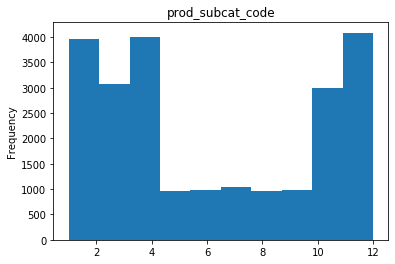

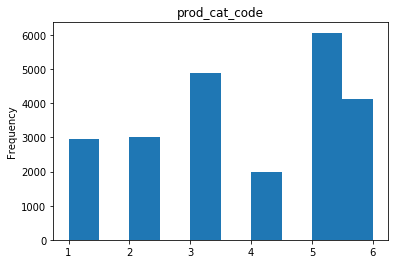

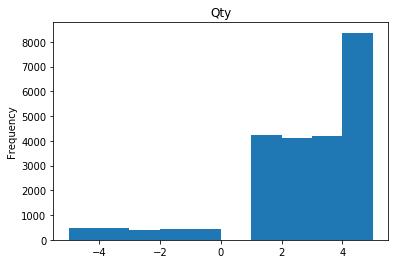

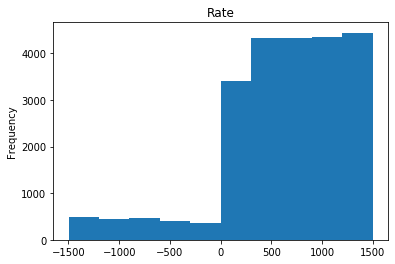

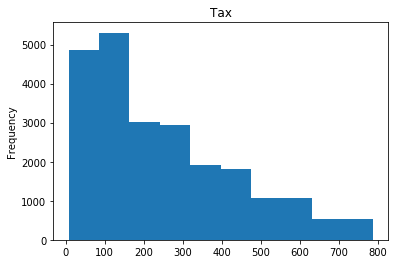

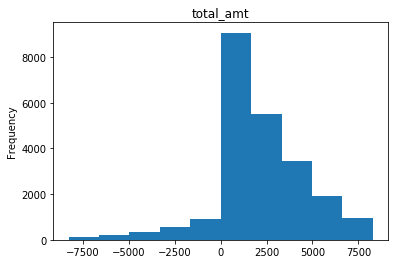

In [140]:
for i in conti_var:
    customer_final[i].plot(kind = 'hist')
    plt.title(i)
    plt.show()

In [182]:
#listed out categorical variables
cat_var = customer_final.loc[:,customer_final.dtypes=="object"].columns
cat_var

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

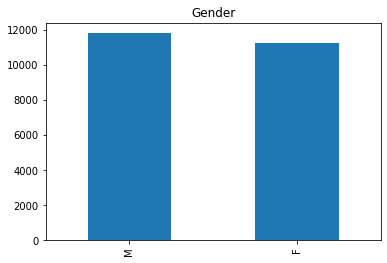

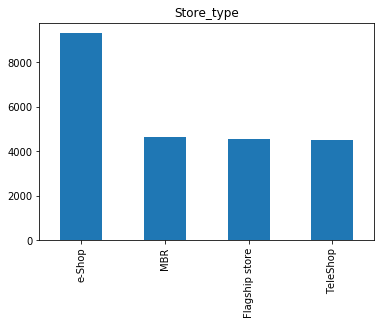

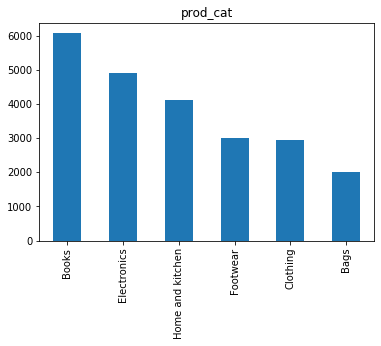

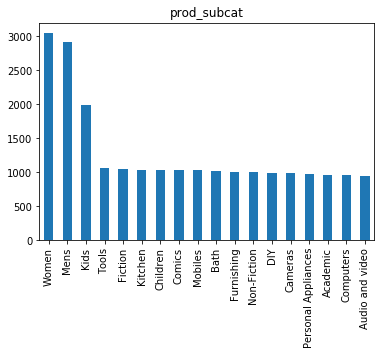

In [184]:
for i in cat_var:
    customer_final[i].value_counts().plot(kind = 'bar')
    plt.title(i)
    plt.show()

### 4. Calculate the following information using the merged dataset : 
### a. Time period of the available transaction data

In [203]:
max_date= customer_final["tran_date"].max()
min_date= customer_final["tran_date"].min()
print("Time period of the available transaction data is from "+ str(max_date.date()) + " to " + str(min_date.date()))

Time period of the available transaction data is from 2014-12-02 to 2011-01-02


### b. Count of transactions where the total amount of transaction was negative 

In [209]:
customer_final[customer_final.total_amt < 0]['transaction_id'].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [251]:
#group by product and gender
cat_det = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].count().reset_index().sort_values(by=["Qty"],ascending=False)

cat_det.head(2)

,Gender,prod_cat,Qty
7,M,Books,3116
1,F,Books,2949


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [321]:
# get city code that has max customers
city_max = customer_final['city_code'].value_counts().iloc[:1,]
# Calculate percentage of customer 
(city_max/len(customer_final))*100